<a href="https://colab.research.google.com/github/codelspak/Struggles/blob/main/WK25_case1_Kaggle_ML_Classification_Titanic.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Titanic Data Science Solutions - Workflow information
[Kaggle 노트북 출처](https://www.kaggle.com/code/startupsci/titanic-data-science-solutions)

# 1. 라이브러리 및 데이터 불러오기
    

In [ ]:
# data analysis and wrangling (복잡하고 오래 계속되는 논쟁, 언쟁, 다툼)
import pandas as pd
import numpy as np
import random as rnd
# visualization
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline 
# IPython에서 제공하는 Rich output(도표와 같은 그림, 소리, 애니메이션과 같은 결과물)에 대한 표현 방식
# 결국 notebook을 실행한 브라우저에서 바로 Rich output을 볼 수 있게 해주는 것임

# import plotly.express as px

# machine learning
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier

참고. %matplotlib inline <br>
IPython에서 제공하는 Rich output(도표와 같은 그림, 소리, 애니메이션과 같은 결과물)에 대한 표현 방식 <br>
결국 notebook을 실행한 브라우저에서 바로 Rich output을 볼 수 있게 해주는 것임<br>
[%matplotlib inline 관련 sources](https://stackoverflow.com/questions/43027980/purpose-of-matplotlib-inline)



In [ ]:
# drive에서 파일 불러오기
from google.colab import drive 
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
df_test = pd.read_csv('/content/drive/MyDrive/2. Kaggle Struggle/1. Titanic - Machine Learning from Disaster/test.csv')
df_train = pd.read_csv('/content/drive/MyDrive/2. Kaggle Struggle/1. Titanic - Machine Learning from Disaster/train.csv')
# combine those datasets to run certain operations on both datasets together 
combine = [df_train, df_test]


# 2. 데이터 EDA

## 2-1. Analyze by describing data

In [ ]:
# which features are available in our dataset
print(df_train.columns.values)
# Index -> array -> just list : .values와 print 구문 조합으로 깔끔하게 결과값만 출력할 수 있음! 

['PassengerId' 'Survived' 'Pclass' 'Name' 'Sex' 'Age' 'SibSp' 'Parch'
 'Ticket' 'Fare' 'Cabin' 'Embarked']


In [ ]:
df_train.head(3)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S


In [ ]:
df_train.tail()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.00,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.00,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.45,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.00,C148,C
890,891,0,3,"Dooley, Mr. Patrick",male,32.0,0,0,370376,7.75,NaN,Q


### 2-1-2. 결측치, dtypes, info() 확인

In [ ]:
print(f"df_train' shape : \t{df_train.shape}\ndf_test'shape : \t{df_test.shape}")

df_train' shape : 	(891, 12)
df_test'shape : 	(418, 11)


In [ ]:
# which features contain blank, null or empty values? -> require correcting
df_null = pd.concat([df_train.isnull().sum(), df_test.isnull().sum()], axis = 1)
df_null.columns = ['df_train', 'df_test']
df_null['sum'] = df_null['df_train'] + df_null['df_test']
df_null = df_null.sort_values('sum', ascending = False).drop('sum', axis = 1)
df_null.head()

,df_train,df_test
Cabin,687,327.0
Age,177,86.0
Embarked,2,0.0
Fare,0,1.0
PassengerId,0,0.0


In [ ]:
# what are the data types for various features?
df_train.dtypes, df_test.dtypes

(PassengerId      int64
 Survived         int64
 Pclass           int64
 Name            object
 Sex             object
 Age            float64
 SibSp            int64
 Parch            int64
 Ticket          object
 Fare           float64
 Cabin           object
 Embarked        object
 dtype: object, PassengerId      int64
 Pclass           int64
 Name            object
 Sex             object
 Age            float64
 SibSp            int64
 Parch            int64
 Ticket          object
 Fare           float64
 Cabin           object
 Embarked        object
 dtype: object)

In [ ]:
df_train.info(), print('-'*40), df_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB
----------------------------------------
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Passenger

(None, None, None)

In [ ]:
df_train.shape, df_test.shape

((891, 12), (418, 11))

### 2-1-3. 분포 확인

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f5d8355fb50>,
      dtype=object)

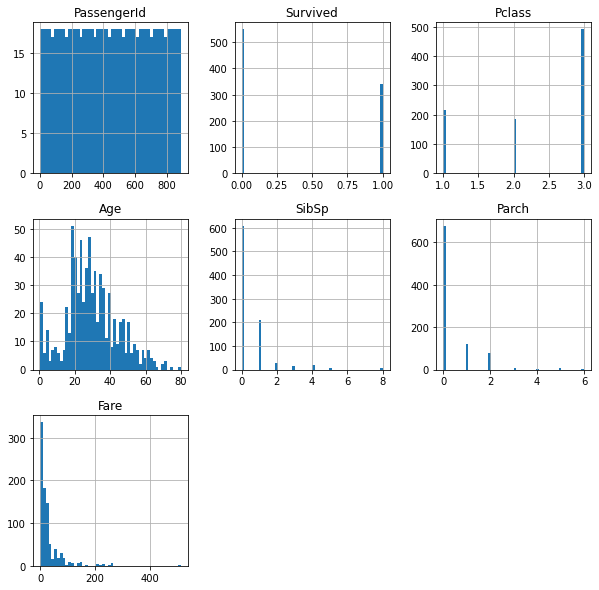

In [ ]:
df_train.hist(bins = 50, figsize = (10,10))

In [ ]:
# 나이 / 동행 가족 등은 0값이 의미가 충분히 가능하고 의미가 있어보이는 반면, Fare == 0 은 뭔가 NaN이 아닐 뿐, 사실상 의미가 없는 값이 아닐까 함
df_train[df_train['Fare']==0]

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
179,180,0,3,"Leonard, Mr. Lionel",male,36.0,0,0,LINE,0.0,NaN,S
263,264,0,1,"Harrison, Mr. William",male,40.0,0,0,112059,0.0,B94,S
271,272,1,3,"Tornquist, Mr. William Henry",male,25.0,0,0,LINE,0.0,NaN,S
277,278,0,2,"Parkes, Mr. Francis ""Frank""",male,NaN,0,0,239853,0.0,NaN,S
302,303,0,3,"Johnson, Mr. William Cahoone Jr",male,19.0,0,0,LINE,0.0,NaN,S
413,414,0,2,"Cunningham, Mr. Alfred Fleming",male,NaN,0,0,239853,0.0,NaN,S
466,467,0,2,"Campbell, Mr. William",male,NaN,0,0,239853,0.0,NaN,S
481,482,0,2,"Frost, Mr. Anthony Wood ""Archie""",male,NaN,0,0,239854,0.0,NaN,S
597,598,0,3,"Johnson, Mr. Alfred",male,49.0,0,0,LINE,0.0,NaN,S
633,634,0,1,"Parr, Mr. William Henry Marsh",male,NaN,0,0,112052,0.0,NaN,S


In [ ]:
# 수치형 데이터 기술통계 
df_train.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [ ]:
# 범주형 데이터 기술통계 (분포)
# df_train.describe(include = 'object') : 아래와 같이 쓸 수도 있음
df_train.describe(include = ['O'])


,Name,Sex,Ticket,Cabin,Embarked
count,891,891,891,204,889
unique,891,2,681,147,3
top,"Braund, Mr. Owen Harris",male,347082,B96 B98,S
freq,1,577,7,4,644


## 2-2. Analyze by pivoting features

In [ ]:
df_train.head(3)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S


In [ ]:
# 대문자 귀찮아서 소문자화 (나중에 팀이랑 통합 필요하면 다시 합쳐주자)
df_train.columns = df_train.columns.str.lower()
df_test.columns = df_test.columns.str.lower()
df_train.head(3)

,passengerid,survived,pclass,name,sex,age,sibsp,parch,ticket,fare,cabin,embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S


### 2-2-1. correlating - 히트맵 / 상관계수



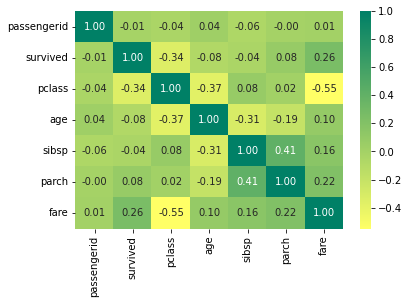

In [ ]:
# 상관관계 우선 확인해봄(feature 간)
_ = sns.heatmap(df_train.corr(), cmap = 'coolwarm', annot = True, fmt = '.2f')

feature <-> label data 간 상관관계 분석<BR>
모델에 어떤 feature를 포함시킬 지 나눠서 확인해봄!!

In [ ]:
# 1. survived - pclass
df_train.groupby('pclass', as_index = False)['survived'].mean().sort_values(by = 'survived', ascending = False)

,pclass,survived
0,1,0.629630
1,2,0.472826
2,3,0.242363


In [ ]:
round(df_train.corr().loc['survived', 'pclass'],2)

-0.34

sex : male / female -> 0 / 1 or 1 / 0처럼 수치형으로 바꿔준 뒤에 분석<BR>
age - survived (x) 결측치 보완 후 재실행 필요하므로, 아래에서 진행함<BR>
cabin - survived (x) 결측치 보완 후 재실행<BR>
embarked :수치형으로 바꿔준 뒤에 분석 필요하므로, 아래에서 진행함


In [ ]:
# 2. sex - survived
df_train.groupby('sex', as_index = False)['survived'].mean().sort_values(by = 'survived', ascending = False)

,sex,survived
0,female,0.742038
1,male,0.188908


In [ ]:
# 4. sibsp - survived
df_train.groupby('sibsp', as_index = False)['survived'].mean().sort_values(by = 'survived', ascending = False)

,sibsp,survived
1,1,0.535885
2,2,0.464286
0,0,0.345395
3,3,0.250000
4,4,0.166667
5,5,0.000000
6,8,0.000000


In [ ]:
round(df_train.corr().loc['survived', 'sibsp'], 2)

-0.04

In [ ]:
# 5. parch - survived
df_train.groupby('parch', as_index = False)['survived'].mean().sort_values(by = 'survived', ascending = False)

,parch,survived
3,3,0.600000
1,1,0.550847
2,2,0.500000
0,0,0.343658
5,5,0.200000
4,4,0.000000
6,6,0.000000


In [ ]:
round(df_train.corr().loc['survived', 'parch'], 2)

0.08

In [ ]:
# 6. fare - survived - continuous numeric type : 땡
round(df_train.corr().loc['survived', 'fare'], 2)

0.26

In [ ]:
# 8. embarked - survived
df_train.groupby('embarked', as_index = False)['survived'].mean().sort_values(by = 'survived', ascending = False)

,embarked,survived
0,C,0.553571
1,Q,0.389610
2,S,0.336957


### 2-2-2. correlating - 그래프 (서브플롯) 시각화

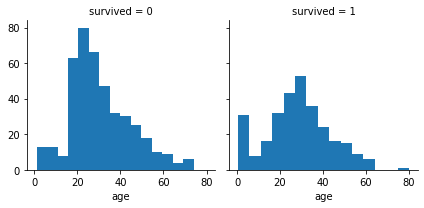

In [ ]:
age_hist = sns.FacetGrid(df_train, col = 'survived') 
age_hist.map(plt.hist, 'age', bins = 15)

In [ ]:
df_train['survived'].value_counts() / 891 * 100

0    61.616162
1    38.383838
Name: survived, dtype: float64

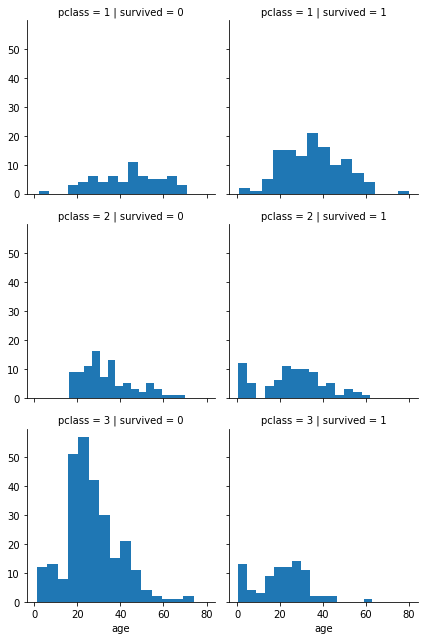

In [ ]:
pclass_hist = sns.FacetGrid(df_train, col = 'survived', row = 'pclass') 
pclass_hist.map(plt.hist, 'age', bins = 15)


/usr/local/lib/python3.7/dist-packages/seaborn/axisgrid.py:337: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/axisgrid.py:670: UserWarning: Using the pointplot function without specifying `order` is likely to produce an incorrect plot.
  warnings.warn(warning)
/usr/local/lib/python3.7/dist-packages/seaborn/axisgrid.py:675: UserWarning: Using the pointplot function without specifying `hue_order` is likely to produce an incorrect plot.
  warnings.warn(warning)


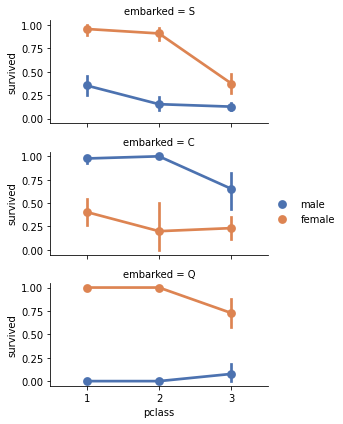

In [ ]:
embarked_grid = sns.FacetGrid(df_train, row='embarked', size=2, aspect=2)
embarked_grid.map(sns.pointplot, 'pclass', 'survived', 'sex', palette='deep')
embarked_grid.add_legend()

/usr/local/lib/python3.7/dist-packages/seaborn/axisgrid.py:337: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/axisgrid.py:670: UserWarning: Using the barplot function without specifying `order` is likely to produce an incorrect plot.
  warnings.warn(warning)


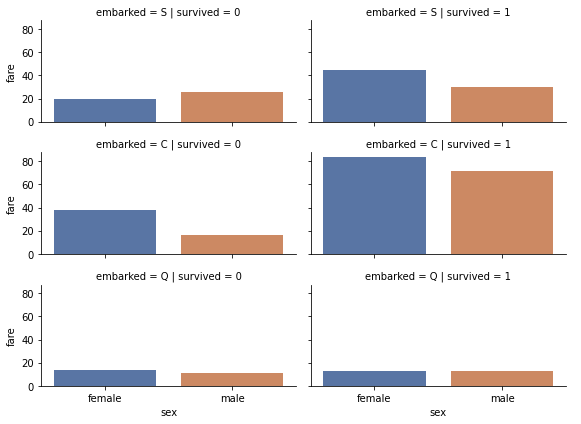

In [ ]:
embarked_grid_2 = sns.FacetGrid(df_train, row='embarked', col = 'survived', size=2, aspect=2)
embarked_grid_2.map(sns.barplot, 'sex', 'fare', palette='deep', ci= None )
embarked_grid_2.add_legend()

### 2-2-3. Correting - 불필요한 컬럼 삭제


In [ ]:
df_train.head(3)

,passengerid,survived,pclass,name,sex,age,sibsp,parch,ticket,fare,cabin,embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S


In [ ]:
df_test.head(2)

,passengerid,pclass,name,sex,age,sibsp,parch,ticket,fare,cabin,embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S


In [ ]:
# shape and columns before completing
print(f'Before\ndf_train \t\t{df_train.shape}\ndf_test \t\t{df_test.shape}\ncombine[0] \t\t{combine[0].shape}\ncombine[1] \t\t{combine[1].shape}\n')

Before
df_train 		(891, 12)
df_test 		(418, 11)
combine[0] 		(891, 12)
combine[1] 		(418, 11)



In [ ]:
df_train = df_train.drop(['name', 'ticket', 'cabin'], axis=1)
df_test = df_test.drop(['name', 'ticket', 'cabin'], axis=1)
combine = [df_train, df_test]

In [ ]:
# shape and columns after completing
print(f'After\ndf_train \t\t{df_train.shape}\ndf_test \t\t{df_test.shape}\ncombine[0] \t\t{combine[0].shape}\ncombine[1] \t\t{combine[1].shape}\n')

After
df_train 		(891, 9)
df_test 		(418, 8)
combine[0] 		(891, 9)
combine[1] 		(418, 8)



### 2-2-4. Creating / Completing : 파생변수 생성 및 결측치 보완


In [ ]:
# convert categorical feature into numeric feature
# sex : female = 0, male = 1
for dataset in combine :
    dataset['sex'] = dataset['sex'].map({'female':0, 'male':1}).astype(int)

In [ ]:
# combine을 바꿔주면 알아서 df_train, df_test까지 같이 바뀜!
df_train.head(3)

,passengerid,survived,pclass,sex,age,sibsp,parch,fare,embarked
0,1,0,3,1,22.0,1,0,7.2500,S
1,2,1,1,0,38.0,1,0,71.2833,C
2,3,1,3,0,26.0,0,0,7.9250,S


In [ ]:
df_train.isnull().sum()

passengerid      0
survived         0
pclass           0
sex              0
age            177
sibsp            0
parch            0
fare             0
embarked         2
dtype: int64

In [ ]:
df_test.isnull().sum()

passengerid     0
pclass          0
sex             0
age            86
sibsp           0
parch           0
fare            1
embarked        0
dtype: int64

Age 결측치를, sex와 pclass 두 개 feature에 의거해서 채워줄 것임 <br>
각 2개, 3개 클래스를 갖는 sex, pclass 데이터의 조합을 고려하여 2*3 array를 활용해줌

In [ ]:
# 빈 array 생성
guess_ages_array = np.zeros((2,3))
guess_ages_array

array([[0., 0., 0.],
       [0., 0., 0.]])

In [ ]:
guess_ages_array.shape

(2, 3)

In [ ]:
for dataset in combine : 
    for i in range(guess_ages_array.shape[0]): 
        for j in range(guess_ages_array.shape[1]):
            df_guess = dataset.loc[(dataset['sex'] == i) & \
                                   (dataset['pclass'] == j+1), 'age'].dropna()
            age_guess = df_guess.median()
            # guess_ages[i,j] = int( age_guess/0.5 + 0.5 ) * 0.5
            guess_ages_array[i,j] = int(age_guess)

    for i in range(guess_ages_array.shape[0]): 
        for j in range(guess_ages_array.shape[1]):
            dataset.loc[ (dataset.age.isnull()) & (dataset.sex == i) & \
                        (dataset.pclass == j+1),'age'] = guess_ages_array[i,j]

    dataset['age'] = dataset['age'].astype(int)

df_train.head(3)

,passengerid,survived,pclass,sex,age,sibsp,parch,fare,embarked
0,1,0,3,1,22,1,0,7.2500,S
1,2,1,1,0,38,1,0,71.2833,C
2,3,1,3,0,26,0,0,7.9250,S


In [ ]:
df_train.isnull().sum()

passengerid    0
survived       0
pclass         0
sex            0
age            0
sibsp          0
parch          0
fare           0
embarked       2
dtype: int64

In [ ]:
df_test.isnull().sum()

passengerid    0
pclass         0
sex            0
age            0
sibsp          0
parch          0
fare           1
embarked       0
dtype: int64

In [ ]:
df_train[df_train['embarked'].isnull()]

,passengerid,survived,pclass,sex,age,sibsp,parch,fare,embarked
61,62,1,1,0,38,0,0,80.0,NaN
829,830,1,1,0,62,0,0,80.0,NaN


In [ ]:
df_test[df_test['fare'].isnull()]

,passengerid,pclass,sex,age,sibsp,parch,fare,embarked
152,1044,3,1,60,0,0,NaN,S


In [ ]:
# create age_range feature
df_train['ageband'] = pd.cut(df_train['age'], 5)
df_train.head()

,passengerid,survived,pclass,sex,age,sibsp,parch,fare,embarked,ageband
0,1,0,3,1,22,1,0,7.2500,S,"(16.0, 32.0]"
1,2,1,1,0,38,1,0,71.2833,C,"(32.0, 48.0]"
2,3,1,3,0,26,0,0,7.9250,S,"(16.0, 32.0]"
3,4,1,1,0,35,1,0,53.1000,S,"(32.0, 48.0]"
4,5,0,3,1,35,0,0,8.0500,S,"(32.0, 48.0]"


In [ ]:
df_train[['ageband', 'survived']].groupby(['ageband'], as_index = False).mean().sort_values(by = 'ageband', ascending = True)

,ageband,survived
0,"(-0.08, 16.0]",0.550000
1,"(16.0, 32.0]",0.337374
2,"(32.0, 48.0]",0.412037
3,"(48.0, 64.0]",0.434783
4,"(64.0, 80.0]",0.090909


In [ ]:
df_test.dtypes

passengerid      int64
pclass           int64
sex              int64
age              int64
sibsp            int64
parch            int64
fare           float64
embarked        object
dtype: object

In [ ]:
for dataset in combine :
    dataset['ageband'] = 1
    dataset.loc[ (dataset['age']<=16), 'ageband'] = 0
    dataset.loc[ (dataset['age']>16) & (dataset['age']<=32), 'ageband'] = 1
    dataset.loc[ (dataset['age']>32) & (dataset['age']<=48), 'ageband'] = 2
    dataset.loc[ (dataset['age']>48) & (dataset['age']<=64), 'ageband'] = 3
    dataset.loc[ (dataset['age']>64), 'ageband'] = 4

df_train.head()

,passengerid,survived,pclass,sex,age,sibsp,parch,fare,embarked,ageband
0,1,0,3,1,22,1,0,7.2500,S,1
1,2,1,1,0,38,1,0,71.2833,C,2
2,3,1,3,0,26,0,0,7.9250,S,1
3,4,1,1,0,35,1,0,53.1000,S,2
4,5,0,3,1,35,0,0,8.0500,S,2


In [ ]:
# create family_size feature
for dataset in combine : 
    dataset['familysize'] = dataset['sibsp'] + dataset['parch'] + 1

df_train = df_train.drop(['sibsp', 'parch'], axis =1)
df_test = df_test.drop(['sibsp', 'parch'], axis =1)
combine = [df_train, df_test]

df_train.head(3)
# combine[0].head()

,passengerid,survived,pclass,sex,age,fare,embarked,ageband,familysize
0,1,0,3,1,22,7.2500,S,1,2
1,2,1,1,0,38,71.2833,C,2,2
2,3,1,3,0,26,7.9250,S,1,1


In [ ]:
df_train[['familysize', 'survived']].groupby('familysize', as_index = False).mean().sort_values(by = 'survived', ascending = False)

,familysize,survived
3,4,0.724138
2,3,0.578431
1,2,0.552795
6,7,0.333333
0,1,0.303538
4,5,0.200000
5,6,0.136364
7,8,0.000000
8,11,0.000000


In [ ]:
# create new categorical feature : isalone or not
for dataset in combine :
    dataset['isalone'] = 0
    dataset.loc[dataset['familysize'] == 1, 'isalone'] = 1

df_test.head(2)

,passengerid,pclass,sex,age,fare,embarked,ageband,familysize,isalone
0,892,3,1,34,7.8292,Q,2,1,1
1,893,3,0,47,7.0000,S,2,2,0


In [ ]:
top_freq_port = df_train['embarked'].dropna().mode()[0]
top_freq_port

'S'

In [ ]:
for dataset in combine :
    dataset['embarked'] = dataset['embarked'].fillna(top_freq_port)

df_train.isnull().sum()

passengerid    0
survived       0
pclass         0
sex            0
age            0
fare           0
embarked       0
ageband        0
familysize     0
isalone        0
dtype: int64

In [ ]:
df_train[['embarked', 'survived']].groupby('embarked', as_index = False).mean().sort_values(by = 'survived', ascending = False)


,embarked,survived
0,C,0.553571
1,Q,0.389610
2,S,0.339009


In [ ]:
port_num_dict = {'S':0, 'C':1, 'Q':2}

for dataset in combine :
    dataset['embarked'] = dataset['embarked'].map(port_num_dict).astype(int)

df_train.head(3)

,passengerid,survived,pclass,sex,age,fare,embarked,ageband,familysize,isalone
0,1,0,3,1,22,7.2500,0,1,2,0
1,2,1,1,0,38,71.2833,1,2,2,0
2,3,1,3,0,26,7.9250,0,1,1,1


In [ ]:
# df_test null 보완
df_test['fare'] = df_test['fare'].fillna(df_test['fare'].dropna().median()) # 근데 왜 위에선 mode, 여기선 median 넣어줌? 
df_test.isnull().sum()

passengerid    0
pclass         0
sex            0
age            0
fare           0
embarked       0
ageband        0
familysize     0
isalone        0
dtype: int64

수치형 변수의 분할 : pd.cut() - 동일한 길이로 나눔, pd.qcut() - 동일한 갯수로 나눔  <br>
[참고 블로그](https://kimdingko-world.tistory.com/209)

In [ ]:
df_train['fareband'] = pd.qcut(df_train['fare'], 4)
df_train[['fareband', 'survived']].groupby('fareband', as_index = False).mean().sort_values(by = 'fareband', ascending = False)

,fareband,survived
3,"(31.0, 512.329]",0.581081
2,"(14.454, 31.0]",0.454955
1,"(7.91, 14.454]",0.303571
0,"(-0.001, 7.91]",0.197309


In [ ]:
# convert the fare feature to ordinal values based on the fareband
for dataset in combine:
    dataset.loc[ dataset['fare'] <= 7.91, 'fare'] = 0
    dataset.loc[(dataset['fare'] > 7.91) & (dataset['fare'] <= 14.454), 'fare'] = 1
    dataset.loc[(dataset['fare'] > 14.454) & (dataset['fare'] <= 31), 'fare']   = 2
    dataset.loc[ dataset['fare'] > 31, 'fare'] = 3
    dataset['fare'] = dataset['fare'].astype(int)

df_train = df_train.drop('fareband', axis = 1)
combine = [df_train, df_test]

df_train.head(5)

,passengerid,survived,pclass,sex,age,fare,embarked,ageband,familysize,isalone
0,1,0,3,1,22,0,0,1,2,0
1,2,1,1,0,38,3,1,2,2,0
2,3,1,3,0,26,1,0,1,1,1
3,4,1,1,0,35,3,0,2,2,0
4,5,0,3,1,35,1,0,2,1,1


In [ ]:
df_test.head(2)

,passengerid,pclass,sex,age,fare,embarked,ageband,familysize,isalone
0,892,3,1,34,0,2,2,1,1
1,893,3,0,47,0,0,2,2,0


# 3. Model, Predict and Solve

In [ ]:
df_train.head()

,passengerid,survived,pclass,sex,age,fare,embarked,ageband,familysize,isalone
0,1,0,3,1,22,0,0,1,2,0
1,2,1,1,0,38,3,1,2,2,0
2,3,1,3,0,26,1,0,1,1,1
3,4,1,1,0,35,3,0,2,2,0
4,5,0,3,1,35,1,0,2,1,1


In [ ]:
df_test.head()

,passengerid,pclass,sex,age,fare,embarked,ageband,familysize,isalone
0,892,3,1,34,0,2,2,1,1
1,893,3,0,47,0,0,2,2,0
2,894,2,1,62,1,2,3,1,1
3,895,3,1,27,1,0,1,1,1
4,896,3,0,22,1,0,1,3,0


In [ ]:
label_name = 'survived'

In [ ]:
feature_names = df_train.columns.tolist()
feature_names.remove('survived')
feature_names.remove('passengerid')
feature_names

['pclass',
 'sex',
 'age',
 'fare',
 'embarked',
 'ageband',
 'familysize',
 'isalone']

## 3-1. 문제와 정답 나누기

In [ ]:
X = df_train[feature_names]
y = df_train[label_name]
X.shape, y.shape

((891, 8), (891,))

In [ ]:
y.value_counts(normalize=True) * 100

0    61.616162
1    38.383838
Name: survived, dtype: float64

In [ ]:
# train_test_split 으로 무작위로 데이터셋을 train 과 test 로 나눕니다.
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.3, stratify=y, random_state=42)

In [ ]:
# 데이터의 행과 열의 개수를 확인합니다.
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((623, 8), (268, 8), (623,), (268,))

In [ ]:
# stratify 로 클래스 별로 균등하게 잘 나뉘었는지 확인
y_train.value_counts(normalize=True) * 100

0    61.637239
1    38.362761
Name: survived, dtype: float64

In [ ]:
y_test.value_counts(normalize=True) * 100

0    61.567164
1    38.432836
Name: survived, dtype: float64

## 3-2. 하이퍼 파라미터 튜닝

In [ ]:
from sklearn.model_selection import cross_val_predict

# Gridsearch 이용해줄거임!
# 트리 깊이 설정
max_depth_list = np.random.randint(2, 7, 10)
max_depth_list = np.unique(max_depth_list)
# max_features 비율
max_features_list = np.random.uniform(0.3, 0.7, 10)

max_depth_list, max_features_list

(array([2, 4, 5, 6]),
 array([0.65259949, 0.67938222, 0.50164813, 0.44565396, 0.66714944,
        0.63312267, 0.56180022, 0.46729527, 0.37213431, 0.42863409]))

In [ ]:
# Decision tree
# from sklearn.tree import DecisionTreeClassifier
# X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, stratify=y, random_state=42) 기준

tree = DecisionTreeClassifier()
tree.fit(X_train, y_train)
tree_predict = tree.predict(X_test)

tree_score = (y_test == tree_predict).mean() * 100
tree_score

77.98507462686567

In [ ]:
# 파라미터 튜닝으로 최적 조건 찾아줬을 떄! 

accuracy_list = []
for max_depth in max_depth_list:
    for max_features in max_features_list:
        acc_list = []
        model = DecisionTreeClassifier(max_depth=max_depth, max_features=max_features, random_state=42)
        y_predict = cross_val_predict(model, X_train, y_train, cv=4, n_jobs=-1)
        acc = (y_train == y_predict).mean()

        acc_list.append(max_depth)
        acc_list.append(max_features)
        acc_list.append(acc)
        accuracy_list.append(acc_list)

In [ ]:
df_acc = pd.DataFrame(accuracy_list, columns=["max_depth", "max_features", "accuracy"])
df_acc.nlargest(5, "accuracy")


,max_depth,max_features,accuracy
32,6,0.501648,0.821830
36,6,0.561800,0.821830
10,4,0.652599,0.815409
11,4,0.679382,0.815409
12,4,0.501648,0.815409


In [ ]:
# 그리드 서치 이용해줄거임
from sklearn.model_selection import GridSearchCV

parameters = {'max_depth': max_depth_list, 'max_features': max_features_list}
clf = GridSearchCV(model, param_grid=parameters, scoring="accuracy", n_jobs=-1, cv=5, verbose=2)
clf.fit(X_train, y_train)

Fitting 5 folds for each of 40 candidates, totalling 200 fits


GridSearchCV(cv=5,
             estimator=DecisionTreeClassifier(max_depth=6,
                                              max_features=0.42863409192925245,
                                              random_state=42),
             n_jobs=-1,
             param_grid={'max_depth': array([2, 4, 5, 6]),
                         'max_features': array([0.65259949, 0.67938222, 0.50164813, 0.44565396, 0.66714944,
       0.63312267, 0.56180022, 0.46729527, 0.37213431, 0.42863409])},
             scoring='accuracy', verbose=2)

In [ ]:
clf.best_score_
if clf.best_score_ * 100 > tree_score :
    tree_score = clf.best_score_ * 100

tree_score

82.01290322580645

In [ ]:
clf.best_estimator_

DecisionTreeClassifier(max_depth=4, max_features=0.4456539649280231,
                       random_state=42)

In [ ]:
# Random Forest

random_forest = RandomForestClassifier(n_estimators=100)
random_forest.fit(X_train, y_train)
rf_predict = random_forest.predict(X_test)

rf_score = (y_test == rf_predict).mean() * 100
rf_score

79.8507462686567

In [ ]:
# Logistic Regression 그치만 분류

log_reg = LogisticRegression()
log_reg.fit(X_train,y_train)
logreg_predict = log_reg.predict(X_test)
logreg_score = (y_test == logreg_predict).mean() * 100
logreg_score

80.97014925373134

In [ ]:
# Naive Bayes

naive_bayes = GaussianNB()
naive_bayes.fit(X_train, y_train)
nb_pred = naive_bayes.predict(X_test)
nb_score =  (y_test == nb_pred).mean() * 100
nb_score

79.8507462686567

In [ ]:
# K-nearest neighbors
knn = KNeighborsClassifier(n_neighbors = 3)
knn.fit(X_train, y_train)
knn_predict = knn.predict(X_test)
knn_score =  (y_test == knn_predict).mean() * 100
knn_score

73.13432835820896

In [ ]:
# print results
print(f"Scores\n1. Logistic Regression : \t{round(logreg_score,2)}\n2. Naive Bayes :  \t\t{round(nb_score,2)}\n3. k-최근접이웃 :  \t\t{round(knn_score,2)}\n4. Decision Tree :  \t\t{round(tree_score,2)}\n5. Random Forest :  \t\t{round(rf_score,2)}\n")

Scores
1. Logistic Regression : 	80.97
2. Naive Bayes :  		79.85
3. k-최근접이웃 :  		73.13
4. Decision Tree :  		82.01
5. Random Forest :  		79.85



# 4. 결론